In [1]:
import numpy as np
import pystan
import arviz as az
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise 1: Seven scientists

(This example is thanks to [MacKay 2003, exercise 22.15] and [Lee & Wagenmaker 2013, section 4.2].)

Suppose seven scientists all go and perform the same experiment, each collecting a measurement $x_i$ for $i = 1,\dots,7$.

These scientists are varyingly good at their job, and while we can assume each scientist would estimate $x$ correctly _on average_, some of them may have much more error in their measurements than others.

They come back with the following seven observations:

[-27.02    3.57    8.191   9.898   9.603   9.945  10.056]


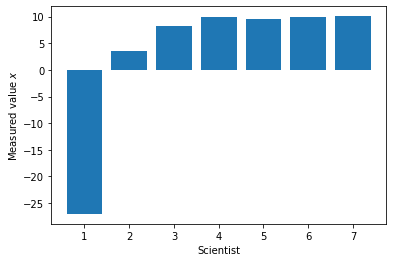

In [2]:
measurements = np.array([-27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056])
print(measurements)
plt.bar(np.arange(1, 8), measurements);
plt.xlabel("Scientist")
plt.ylabel("Measured value $x$");

Clearly scientist 1 does not know what he is doing (and 2 and 3 may be a little suspect too)!

Think for a moment on how we would like to model this situation.

* Can we estimate how accurately each scientist has made their measurement?
* Can we estimate the true value of $x$?

### The following naive model averages all the scientists' measurements.

In this model, we define a parameter $\mu$ which corresponds to the mean of each measurement $x$, and a parameter $\sigma$ which corresponds to its standard deviation.

Hint: it's suggested to define both lower and upper bounds on $\sigma$ — this is often helpful in order to prevent poor behaviour of the sampler. Alternatively, we could place a prior on $\sigma$ as well. For a discussion of priors on scale variables, see https://github.com/stan-dev/stan/wiki/Prior-Choice-Recommendations.



In [3]:
bad_model_code = """
data {
    int N; // number of scientists
    real x[N]; // measurements
}
parameters {
    real mu;             // estimated mean
    real<lower=0,upper=25> sigma; // standard deviation of measurements
}
model {
    x ~ normal(mu, sigma);
}
"""

bad_model = pystan.StanModel(model_code=bad_model_code);

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7962f7aef85e875ee44286298dc9a7cf NOW.
/Users/brooks/miniconda3/envs/stan/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/p5/l7hjjt052zzf95mb4qqnb6nw0000gn/T/tmp9o0i6u0q/stanfit4anon_model_7962f7aef85e875ee44286298dc9a7cf_1254439114353122149.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [4]:
bad_fit = bad_model.sampling(data={'N': 7, 'x': measurements}, iter=1000, chains=4)
print(bad_fit)

Inference for Stan model: anon_model_7962f7aef85e875ee44286298dc9a7cf.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      3.58    0.23    6.4  -9.26  -0.16   3.66   7.47  16.15    761    1.0
sigma  15.76    0.16   4.03    9.1   12.7  15.29  18.64  24.08    598   1.01
lp__   -20.8    0.07   1.35 -24.49 -21.33 -20.38 -19.82 -19.45    386   1.02

Samples were drawn using NUTS at Sun Nov 29 21:33:23 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


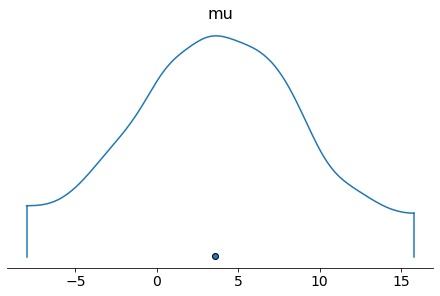

In [5]:
az.plot_density(bad_fit, var_names='mu');

**Q:** What are the mean and standard deviation of $\mu$, and what is its 95% credible interval? Is this consistent with the observed data? Why or why not?

### Assignment: modify the Stan model code below to make a new, better model.

Fill out the `parameters` and `model` block below to define a new model which is a better fit for the data. In particular, consider models in which each scientist may have a different measurement error…

In [6]:
good_model_code = """
data {
    int N; // number of scientists
    real x[7]; // measurements
}
parameters {
    real mu; // estimated mean
    //
    //  YOUR CODE HERE
    //  (be sure to declare a parameter named `sigma` 
    //   for the plots below to work correctly)
    //
}
model {
    //
    //  YOUR CODE HERE
    //
}
"""

good_model = pystan.StanModel(model_code=good_model_code);

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_11dbc5d78983aaf08abc68c6d9d3dd4f NOW.
/Users/brooks/miniconda3/envs/stan/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/p5/l7hjjt052zzf95mb4qqnb6nw0000gn/T/tmp4ztfmegi/stanfit4anon_model_11dbc5d78983aaf08abc68c6d9d3dd4f_936371134807476348.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [7]:
good_fit = good_model.sampling(data={'N': 7, 'x': measurements}, iter=2000, chains=4)
print(good_fit)

Inference for Stan model: anon_model_11dbc5d78983aaf08abc68c6d9d3dd4f.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu          9.2    0.09    1.7   4.03   8.85    9.7   10.0  11.39    344   1.02
sigma[1]   20.7    0.12   2.99  13.69  18.93  21.29  22.75  24.74    626   1.01
sigma[2]  11.91    0.51   6.31   2.37   6.74   11.0  16.04  24.26    155   1.03
sigma[3]   7.71    0.43   6.43   0.57   2.04    5.5  12.28   22.4    219   1.01
sigma[4]   7.13    0.39   6.43   0.25    1.6   5.09  11.22  23.03    278    1.0
sigma[5]   5.92    0.52    6.5   0.07   0.77   3.08   9.22  22.56    157   1.04
sigma[6]   6.28    0.69   6.76   0.08   0.75   3.37  10.05  22.24     97   1.06
sigma[7]   6.18    0.39   6.51   0.11   0.85   3.51   9.85  22.56    273   1.01
lp__      -7.99    0.12    1.9 -12.51  -9.14  -7.58  -6.62  -5.29    269   1.02

Samples we

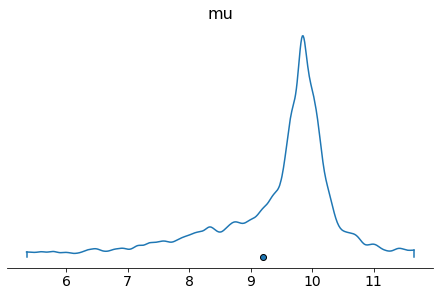

In [8]:
az.plot_density(good_fit, var_names='mu');

### Is this better?

* **Q** What are the mean, median, and mode of this distribution?
* **Q** Is this "consistent" with the measurements of the different scientists? Why or why not?

Plot the different values of $\sigma_i$ for each scientist below.

* **Q** Do these make intuitive sense, given the variation in measurements?
* **Q** To what extent does each individual scientist influence your estimate of $\mu$?
* **Q** This model has estimated a different measurement error for each individual scientist. When else might a model like this be useful? When might such a model be inappropriate?

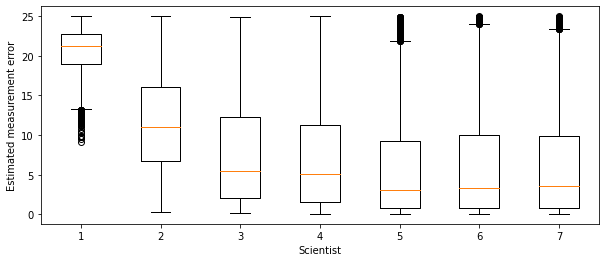

In [9]:
plt.figure(figsize=(10,4))
plt.boxplot(good_fit['sigma'], positions=np.arange(1, 8));
plt.xlabel('Scientist');
plt.ylabel('Estimated measurement error');

## Extensions

### 1. Comparison to dropping outliers

An alternative approach might have been to simply drop the first scientist's result entirely, declaring it an outlier.

You can try this out by using the "bad" model above, and changing the data input. (This doesn't require re-compiling the model!)

In [10]:
six_fit = bad_model.sampling(data={'N': 6, 'x': measurements[1:]}, iter=1000, chains=4)
print(six_fit)

Inference for Stan model: anon_model_7962f7aef85e875ee44286298dc9a7cf.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      8.53    0.05   1.47   5.68   7.63   8.48   9.34  11.77    901    1.0
sigma   3.53    0.07   1.72   1.69   2.44   3.07   4.07   7.95    587   1.01
lp__    -8.5    0.05   1.23 -11.71  -9.02  -8.12   -7.6  -7.27    514   1.01

Samples were drawn using NUTS at Sun Nov 29 21:34:55 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


* **Q** Is dropping suspected outliers better or worse than modeling the measurement error? When? Why?
* **Q** Try changing the measurement vector and re-running inference, in either model. What if there are more scientists whose measurements agree with scientist #1?

### 2. (Optional) Comparison to a random means model

Note that this model differs from the model in the Eight Schools example: it assumes the measurement noise varies, rather than assuming that the effect size is different in each setting.

Consider instead the alternative model:

$$\begin{align*}
\theta_i &\sim \mathcal{N}(\mu, \tau^2) \\
x_i | \theta_i, \sigma &\sim \mathcal{N}(\theta_i, \sigma^2) 
\end{align*}$$

Implement this model below.

In [11]:
alt_model_code = """
data {
    int N; // number of scientists
    real x[N]; // measurements
}
parameters {
    real mu; // estimated mean
    //
    //  YOUR CODE HERE
    //  (declare variables, including `sigma` and `theta`)
    //
}
model {
    //
    //  YOUR CODE HERE
    //
}
"""
alt_model = pystan.StanModel(model_code=alt_model_code);

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5885cac6f831c9049006d000b2a3d9aa NOW.
/Users/brooks/miniconda3/envs/stan/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/p5/l7hjjt052zzf95mb4qqnb6nw0000gn/T/tmpmthyf49w/stanfit4anon_model_5885cac6f831c9049006d000b2a3d9aa_7893445954238119770.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [12]:
alt_fit = alt_model.sampling(data={'N': 7, 'x': measurements}, iter=2000, chains=4)
print(alt_fit)

Inference for Stan model: anon_model_5885cac6f831c9049006d000b2a3d9aa.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         3.48    0.23   8.96 -14.06   -1.1   3.36   7.85  21.51   1526    1.0
tau       14.16    0.35   9.86    2.5   7.91  12.33   17.9  37.89    774    1.0
theta[1]  -13.0    0.55  14.36 -35.97 -24.65  -14.3  -2.38  13.97    677    1.0
theta[2]   3.56    0.21   9.72 -16.41   -1.3   3.63   7.94  24.87   2153    1.0
theta[3]   6.08    0.21   9.92 -13.98   1.13   6.53  10.61  26.45   2265    1.0
theta[4]   7.16    0.25   10.1 -13.41   2.26   7.86  11.77   28.8   1617    1.0
theta[5]   6.83    0.21  10.15 -13.64   1.75   7.37  11.75  25.34   2434    1.0
theta[6]   6.85    0.25  10.13 -14.28   1.97   7.35   12.1  26.33   1618    1.0
theta[7]   6.93    0.23   9.91 -13.63   1.79   7.53  11.84  26.21   1857    1.0
sigma     1

Look at the above table and the following two plots.

* **Q** How does the estimate of the mean of the underlying variable compare with the previous two models?
* **Q** How should we interpret the per-scientist parameters $\theta_i$?
* **Q** Does this model make sense for this data? Why or why not?

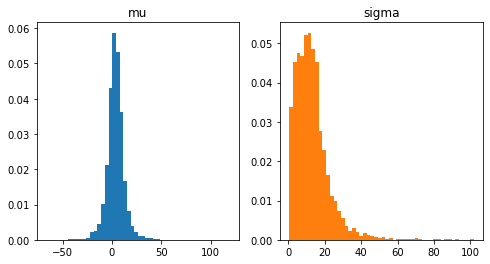

In [13]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(alt_fit['mu'], density=True, bins=50);
plt.title("mu")
plt.subplot(122)
plt.hist(alt_fit['sigma'], density=True, bins=50, color='C1');
plt.title("sigma");

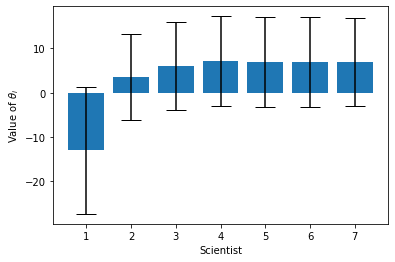

In [14]:
plt.bar(np.arange(1, 8), alt_fit['theta'].mean(0), yerr=alt_fit['theta'].std(0), ecolor='k', capsize=10);
# plt.boxplot(alt_fit['theta'], positions=np.arange(1, 8));
plt.xlabel('Scientist');
plt.ylabel('Value of $\\theta_i$');